#### Libreriras importadas

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [21]:
mu = 10     # Media
sigma = 1   # Desviación estándar

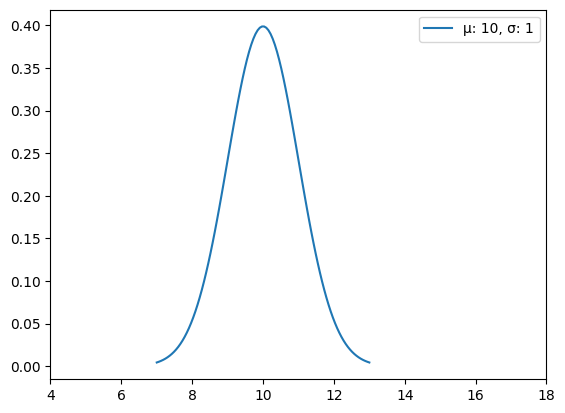

In [22]:
x = np.linspace(7, 13, 100)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, label='μ: 10, σ: 1')

plt.xlim(4,18)
plt.legend()
plt.show()

## CASO: RECIEN NACIDOS

In [23]:
df_nacimientos = pd.read_csv('db/nacimientos_us_2018.csv')
df_nacimientos.head()

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,PESO
0,1,1,27.4,0,3655,7,2017,1,4,11,...,0,0,150,3,1,N,0,F,46,3655
1,1,1,18.7,0,3520,5,2017,1,2,1123,...,0,0,102,3,1,N,0,M,40,3520
2,1,1,44.3,0,2920,5,2017,1,2,107,...,1,0,250,1,1,N,0,F,19,2920
3,1,1,23.7,0,4100,8,2017,2,5,1056,...,3,0,165,4,2,Y,1,F,61,4100
4,1,1,20.2,0,4349,8,2017,,6,244,...,1,0,129,1,1,N,0,M,25,4349


In [24]:
peso_nacimientos = df_nacimientos['DBWT']
peso_nacimientos.head()

0    3655
1    3520
2    2920
3    4100
4    4349
Name: DBWT, dtype: int64

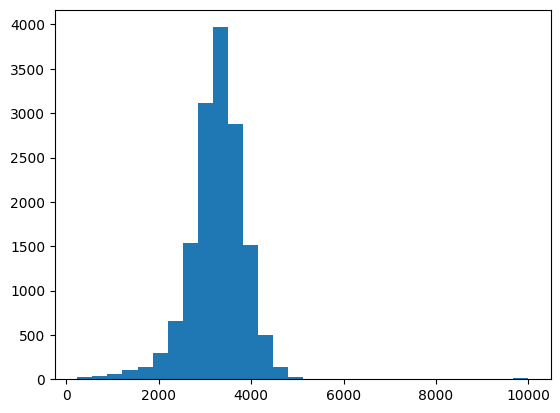

In [25]:
plt.hist(peso_nacimientos, bins=30);

In [26]:
peso_mayor_6000 = df_nacimientos[df_nacimientos['DBWT'] > 6000]
peso_mayor_6000

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,...,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,PESO
2691,3,1,99.9,0,9999,99,9999,2,1,1754,...,0,0,118,1,1,N,0,M,0,9999
5721,1,1,20.6,0,9999,4,2018,1,8,1145,...,1,0,120,1,1,N,0,F,5,9999
7529,2,1,38.1,0,9999,11,2017,,3,135,...,0,0,229,1,1,N,0,M,3,9999
7769,9,5,99.9,99,9999,99,9999,,8,9999,...,2,1,999,1,1,N,0,M,99,9999
8497,1,1,20.9,15,9999,8,2018,2,12,1835,...,0,0,122,1,2,N,0,M,11,9999
9112,3,1,24.5,0,9999,6,2018,2,11,1402,...,0,0,147,1,2,N,0,F,8,9999
9771,1,1,17.5,0,9999,4,2018,1,8,933,...,0,0,115,1,1,N,0,M,17,9999
11531,2,1,28.1,0,9999,1,2018,2,5,345,...,0,3,164,1,2,N,0,M,14,9999
13153,1,1,25.7,0,9999,6,2017,1,2,858,...,0,0,150,3,2,N,0,F,99,9999


##### Descartamos estos datos ya son irrelebantes ⬆️

In [35]:
peso_nacimientos_fil = peso_nacimientos[peso_nacimientos < 6000]
peso_nacimientos_fil

0        3655
1        3520
2        2920
3        4100
4        4349
         ... 
14995    3060
14996    4110
14997    4195
14998    1645
14999    3742
Name: DBWT, Length: 14991, dtype: int64

In [38]:
mu = peso_nacimientos_fil.mean()
mu

np.float64(3252.9672470148757)

In [39]:
sigma = peso_nacimientos_fil.std()
sigma

np.float64(589.0452709387985)

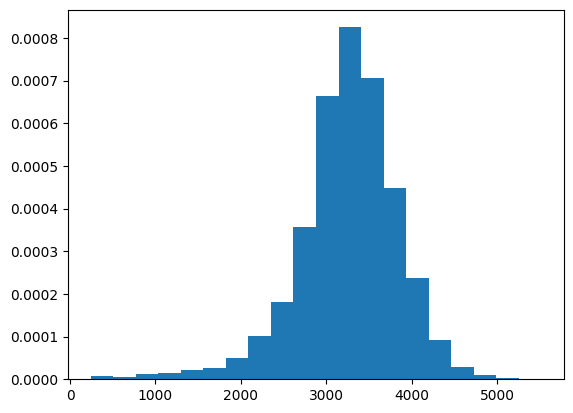

In [44]:
plt.hist(peso_nacimientos_fil, bins=20, density=True);

### Respresentar gráficamente una distribución normal con los parámetros obtenidos donde los valores de 'x' se encuentren en el rango de '1000 - 5000'.

In [48]:
x_inf = 1000
x_sup = 5000

x = np.linspace(x_inf, x_sup, 500)

y = stats.norm.pdf(x, mu, sigma)

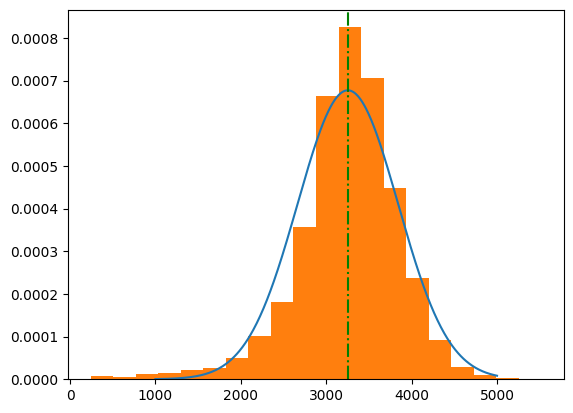

In [78]:
plt.plot(x, y)
plt.axvline(mu, color='green', linestyle='-.')
plt.hist(peso_nacimientos_fil, bins=20, density=True);

#### Densidad de probabilidad para x = 3400g

In [87]:
print(f"La densidad de probabilidad de que un recién nacido tenga un peso superior a 3400g es de: {stats.norm.pdf(3400, mu, sigma)}")

La densidad de probabilidad de que un recién nacido tenga un peso superior a 3400g es de: 0.0006564955494730644


#### Probabilidad de que un recién nacido tenga un peso inferior a 3200g

In [86]:
print(f"La probabilidad de que un recién nacido tenga un peso inferior a 3200g es de: {1 - stats.norm.cdf(3200, mu, sigma)}")

La Probabilidad de que un recién nacido tenga un peso inferior a 3200g es de: 0.5358248059171492


#### Probabilidad de que un recién nacido tenga un peso superior a 4892g

In [89]:
print(f"La probabilidad de que un recién nacido tenga un peso superior a 4892g es de: {1 - stats.norm.cdf(4892, mu, sigma)}")

La probabilidad de que un recién nacido tenga un peso superior a 4892g es de: 0.0026968916814515964
